# Problem statement:

#### A new pharmaceutical startup is recently acquired by one of the world's largest MNCs. For the acquisition process, the startup is required to tabulate all drugs that they have sold and account for each drug's effectiveness. A dedicated team has been assigned the task to analyze all the data. This data has been collected over the years and it contains data points such as the drug's name, reviews by customers, popularity and use cases of the drug, and so on. Members of this team are by the noise present in the data. Your task is to make a sophisticated NLP-based Machine Learning model that has the mentioned features as the input. Also, use the input to predict the base score of a certain drug in a provided case.

In [1]:
# importing pandas and numpy 
import pandas as pd
import numpy as np
# this is to ignore warnings if in case
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the data set 
data_train = pd.read_csv("train.csv")

data_test = pd.read_csv("test.csv")

In [4]:
# checking tope 5 rows
data_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [5]:
# checking tope 5 rows
data_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


### It is a regression problem, as Target(base_score) is continuous values

In [6]:
# checking data distribution
data_train.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


* data looks good with std, min and max, except number_of_time_prescribed is having big number 771

In [7]:
# checking data column types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [8]:
# typecasting the features
data_train['patient_id']=data_train['patient_id'].astype("int32")
data_train['effectiveness_rating']=data_train['effectiveness_rating'].astype("int16")
data_train['number_of_times_prescribed']=data_train['number_of_times_prescribed'].astype("int16")
data_train['base_score']=data_train['base_score'].astype("float16")

In [9]:
# checking data column types
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patient_id                  10760 non-null  int64 
 1   name_of_drug                10760 non-null  object
 2   review_by_patient           10760 non-null  object
 3   drug_approved_by_UIC        10760 non-null  object
 4   number_of_times_prescribed  10760 non-null  int64 
 5   use_case_for_drug           10760 non-null  object
 6   effectiveness_rating        10760 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 588.6+ KB


In [10]:
# checking if null values present in the data
data_train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [11]:
# checking if null values present in the test data
data_test.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

In [12]:
# finding relation between the features
data_train.corr()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
patient_id,1.000000,0.018803,0.017499,0.010920
effectiveness_rating,0.018803,1.000000,0.242224,0.412321
number_of_times_prescribed,0.017499,0.242224,1.000000,0.134308
base_score,0.010920,0.412321,0.134308,1.000000


#### there is moderate relation between 'effectiveness_rating' and 'base_score', apart from this, there is no significant relation between any features. i dont' see any multicolleniarity

# Data Preprocessing

#### No null values in the both trin and test data set

In [13]:
data_train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [14]:
data_test.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

### Encoding categorical(objective type) data into numerical data

In [15]:
len(data_train['name_of_drug'].unique())

2220

In [16]:
# i will encode this objective type data to numerical data using label encoder
from sklearn.preprocessing import LabelEncoder
L_enc=LabelEncoder()

data_train['name_of_drug']=L_enc.fit_transform(data_train['name_of_drug'])
data_test['name_of_drug']=L_enc.fit_transform(data_test['name_of_drug'])

In [18]:
# encoding other features like 'drug_approved_by_UIC' and 'use_case_for_drug' using label encoder 

data_train['drug_approved_by_UIC']=L_enc.fit_transform(data_train['drug_approved_by_UIC'])
data_test['drug_approved_by_UIC']=L_enc.fit_transform(data_test['drug_approved_by_UIC'])

# use_case_for_drug

data_train['use_case_for_drug']=L_enc.fit_transform(data_train['use_case_for_drug'])
data_test['use_case_for_drug']=L_enc.fit_transform(data_test['use_case_for_drug'])

In [19]:
data_test

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,854,"""I&#039;ve tried a few antidepressants over th...",2058,22,130,10
1,39293,311,"""Contrave combines drugs that were used for al...",2640,35,441,9
2,208087,1471,"""4 days in on first 2 weeks. Using on arms an...",2274,13,241,4
3,23295,821,"""Ive been on Methadone for over ten years and ...",998,21,299,7
4,97013,66,"""Ditto on rebound sleepless when discontinued....",442,44,231,2
...,...,...,...,...,...,...,...
10755,151266,253,"""I took chantix a little over a month. It made...",284,2,392,1
10756,139347,106,"""This medicine kept me from sleeping the whole...",2416,18,275,1
10757,159999,1255,"""I have taken Tamoxifen for 5 years. Side effe...",503,43,87,10
10758,130945,725,"""I&#039;m married, 34 years old and I have no ...",680,7,77,8


In [20]:
# lets create a new features which gives length of 'review_by_patient' column
data_train['Len_review']=data_train['review_by_patient'].apply(len)

In [21]:
data_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,Len_review
0,206461,2072,335,"""It has no side effect, I take it in combinati...",9,1474,27,8.023438,79
1,95260,923,39,"""My son is halfway through his fourth week of ...",8,2213,192,7.859375,741
2,92703,1212,110,"""I used to take another oral contraceptive, wh...",5,606,17,6.343750,755
3,35696,332,412,"""Suboxone has completely turned my life around...",9,2305,37,6.589844,719
4,155963,436,105,"""2nd day on 5mg started to work with rock hard...",2,2420,43,6.144531,403


In [22]:
# will check if any review is too short i mean any thing near 2 or 3 characters only

data_train[data_train['Len_review'] < 5]

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,Len_review
25627,116477,990,560,"""-""",10,3355,0,6.109375,3
28686,172398,475,76,"""I""",8,1268,3,7.929688,3
29604,71974,1986,96,"""Ok""",6,1180,7,2.398438,4


### i found there are two reviews which means no meaning , and one review is just 'ok', as of now not treating these rows, as it is very small size data

### Removing punctuations

In [23]:
# will try to remove special characters in the 'revie_by_patient' features as it will not make any sense

# importing strings
import string

print("Special charachters are:", string.punctuation)

Special charachters are: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
# creating function to remove special charaters from the given text

def remove_sc(text):
    res=""
    for char in text:
        if char not in string.punctuation:
            res+="".join(char)
    return res

In [25]:
# lets use this function to filter the 'review_by_patient' feature
data_train['review_by_patient'] = data_train['review_by_patient'].apply(lambda x: remove_sc(x))

# for test data
data_test['review_by_patient'] = data_test['review_by_patient'].apply(lambda x: remove_sc(x))

### Using TFIDF vectorizer to convert test to numerical values

In [26]:
# converting using TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',                     #vectorize 2-character words or more                
    max_features=20000
    )  

In [27]:
# converting text to numerical values using tfidf
review_train = tfidf.fit_transform(data_train['review_by_patient'])

# for testing data
review_test = tfidf.transform(data_test['review_by_patient'])

In [28]:
# lenght of the new features
len(tfidf.get_feature_names())

20000

In [29]:
# size of new features
review_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# creating the dataframe with new features
new_data_train = pd.DataFrame(review_train.toarray(), columns=tfidf.get_feature_names())

new_data_test= pd.DataFrame(review_test.toarray(), columns=tfidf.get_feature_names())

In [31]:
# will make one dataframe with all the features
old_data_train=data_train[['patient_id','name_of_drug','use_case_for_drug','effectiveness_rating','drug_approved_by_UIC',
                          'number_of_times_prescribed','base_score']]
# testing data
old_data_test=data_test[['patient_id','name_of_drug','use_case_for_drug','effectiveness_rating','drug_approved_by_UIC',
                          'number_of_times_prescribed']]

In [32]:
# combining two dataframes into one dataframe with all the features

df_train = pd.concat([old_data_train,new_data_train], axis=1)

df_test = pd.concat([old_data_test ,new_data_test], axis=1)

In [33]:
# checking final dataset 
df_train.head()

,patient_id,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,00,0025,005,...,zubsolv,zumba,zyban,zyclara,zydus,zyprexa,zyrtec,zyrtecd,zyvox,іt
0,206461,2072,335,9,1474,27,8.023438,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,95260,923,39,8,2213,192,7.859375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,92703,1212,110,5,606,17,6.343750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35696,332,412,9,2305,37,6.589844,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,155963,436,105,2,2420,43,6.144531,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# shape of train data
df_train.shape

(32165, 20007)

In [35]:
# shape of test data
df_test.shape

(10760, 20006)

# Feature selection

In [36]:
# as 'patient_id','name_of_drug','drug_approved_by_UIC' has very less correlation with Base_score i will drop these features

df_train.drop(['patient_id','name_of_drug','drug_approved_by_UIC'], axis=1, inplace=True)
df_test.drop(['patient_id','name_of_drug','drug_approved_by_UIC'], axis=1, inplace=True)

In [37]:
# train data after dropping features
df_train.head()

,use_case_for_drug,effectiveness_rating,number_of_times_prescribed,base_score,00,0025,005,006,01,010,...,zubsolv,zumba,zyban,zyclara,zydus,zyprexa,zyrtec,zyrtecd,zyvox,іt
0,335,9,27,8.023438,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39,8,192,7.859375,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,110,5,17,6.343750,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,412,9,37,6.589844,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,105,2,43,6.144531,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model creation

In [38]:
# lets split the data to X(independent), and y(dependent)
X = df_train.drop("base_score", axis=1)
y = df_train['base_score']

In [39]:
# lets split the data into train and validation data
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size=0.25, random_state=16)

### Features  scaling

In [40]:
# lets use minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

con_feat=['use_case_for_drug','number_of_times_prescribed']

X_train[con_feat] = scaler.fit_transform(X_train[con_feat])
X_valid[con_feat] = scaler.transform(X_valid[con_feat])

# for test data as well
df_test[con_feat] = scaler.transform(df_test[con_feat])

# KNeighbors Regressor model

In [41]:
# importing metrics
from sklearn.metrics import mean_squared_error,r2_score

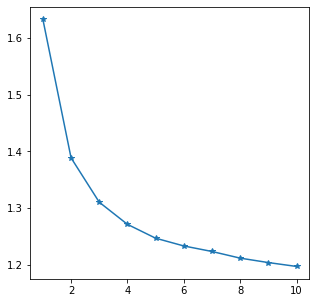

In [42]:
# import and train the model
error_rate=[]
for i in range (1,11):
    from sklearn.neighbors import KNeighborsRegressor
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    y_pred_knr=knr.predict(X_valid)
    error_rate.append(np.sqrt(mean_squared_error(y_valid,y_pred_knr)))
# plot the graph to find the best fit 'k' value

plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),error_rate, marker='*')

In [43]:
# traing model with n_neighbors= 
knn_new = KNeighborsRegressor(n_neighbors=5)

# fitting model with train data
knn_new.fit(X_train,y_train)

KNeighborsRegressor()

In [44]:
# lets predict the score for validation data model
y_pred_kn=knn_new.predict(X_valid)

In [45]:
# mean square error 
mse_knn = mean_squared_error(y_valid,y_pred_kn)
print("mean_squared_error:",mse_knn)

# Root mean squared error
Rmse_knn = np.sqrt(mse_knn)
print("Root_mean_squared_error",Rmse_knn)

mean_squared_error: 1.556
Root_mean_squared_error 1.247


In [46]:
# r2 score
r2_knn = r2_score(y_valid,y_pred_kn)
print("R2_score",r2_knn)

R2_score 0.37765995744699976


In [47]:
# testing and training accuracy
print("Training Accuracy:",knn_new.score(X_train,y_train))
print("Testing Accuracy:",knn_new.score(X_valid,y_valid))

Training Accuracy: 0.5855113852627674
Testing Accuracy: 0.37765995744699976


# Decision tree

In [48]:
# lets import and the model and train the model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=44)

# fitting the model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=44)

In [49]:
# predicting the base_score for X_valid data
y_pred_dt = dtr.predict(X_valid)

In [50]:
# mean square error 
mse_dtr=mean_squared_error(y_valid,y_pred_dt)
print("mean_squared_error:",mse_dtr)

# Root mean squared error
Rmse_dtr=np.sqrt(mse_dtr)
print("Root_mean_squared_error",Rmse_dtr)

mean_squared_error: 0.1477967360161395
Root_mean_squared_error 0.38444341068112936


In [51]:
# r2 score
r2_dtr=r2_score(y_valid,y_pred_dt)
print("R2_score",r2_dtr)

R2_score 0.9408829634802278


In [52]:
# testing and training accuracy
print("Training Accuracy:",dtr.score(X_train,y_train))
print("Testing Accuracy:",dtr.score(X_valid,y_valid))

Training Accuracy: 1.0
Testing Accuracy: 0.9408829634802278


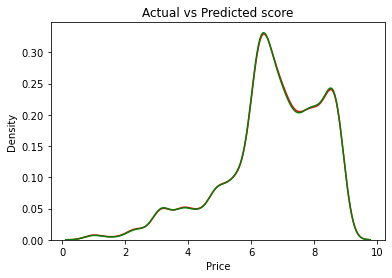

In [67]:
# lets check comparison of validation data and predicted data
ax1=sns.distplot(y_valid,hist=False,color="red")
sns.distplot(y_pred_dt,hist=False,color="g",ax=ax1)
plt.title("Actual vs Predicted score")
plt.xlabel("Price")

plt.show()

# Random Forest model

In [55]:
# lets import the model and fit the model
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(random_state = 42)

# fitting the model
Rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [56]:
#  lets predict the score for validation data model
y_pred_rf=Rf.predict(X_valid)

In [57]:
# mean square error 
mse_rf=mean_squared_error(y_valid,y_pred_rf)
print("mean_squared_error:",mse_rf)

# Root mean squared error
Rmse_rf=np.sqrt(mse_rf)
print("Root_mean_squared_error",Rmse_rf)

mean_squared_error: 0.0993726583511875
Root_mean_squared_error 0.3152342912044746


In [58]:
# r2 score
r2_rf=r2_score(y_valid,y_pred_rf)
print("R2_score",r2_rf)

R2_score 0.9602520513567195


In [59]:
# testing and training accuracy
print("Training Accuracy:",Rf.score(X_train,y_train))
print("Testing Accuracy:",Rf.score(X_valid,y_valid))

Training Accuracy: 0.9943010628236939
Testing Accuracy: 0.9602520513567195


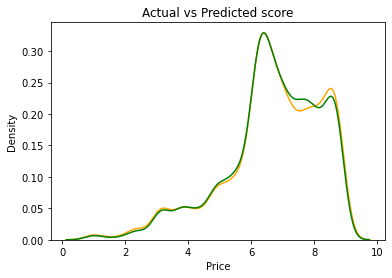

In [60]:
# lets check comparison of validation data and predicted data
ax1=sns.distplot(y_valid,hist=False,color="orange")
sns.distplot(y_pred_rf,hist=False,color="g",ax=ax1)
plt.title("Actual vs Predicted score")
plt.xlabel("Price")

plt.show()

# Gradient Boosting

In [61]:
# lets import and train the model
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=16)

# lets train the model with training data
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=16)

In [62]:
#  lets predict the score for validation data model
y_pred_gb=gbr.predict(X_valid)

In [63]:
# mean square error 
mse_gb = mean_squared_error(y_valid,y_pred_gb)
print("mean_squared_error:",mse_gb)

# Root mean squared error
Rmse_gb = np.sqrt(mse_gb)
print("Root_mean_squared_error",Rmse_gb)

mean_squared_error: 0.307520964483661
Root_mean_squared_error 0.5545457280366165


In [64]:
# r2 score
r2_gb = r2_score(y_valid,y_pred_gb)
print("R2_score",r2_gb)

R2_score 0.876995063774677


In [65]:
# testing and training accuracy
print("Training Accuracy:",gbr.score(X_train,y_train))
print("Testing Accuracy:",gbr.score(X_valid,y_valid))

Training Accuracy: 0.8814247068194934
Testing Accuracy: 0.876995063774677


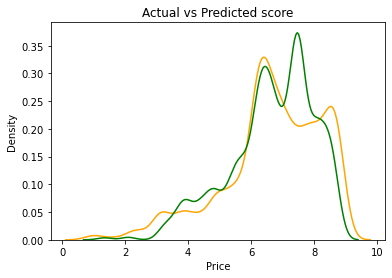

In [66]:
# lets check comparison of validation data and predicted data
ax1=sns.distplot(y_valid,hist=False,color="orange")
sns.distplot(y_pred_gb,hist=False,color="g",ax=ax1)
plt.title("Actual vs Predicted score")
plt.xlabel("Price")

plt.show()

# XGB REgressor

In [68]:
# lets import and train the model
import xgboost
# model creation
from xgboost import XGBRegressor
xgbr=XGBRegressor()

# lets train the model with training data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
#  lets predict the score for validation data model
y_pred_xgb=xgbr.predict(X_valid)

In [70]:
# mean square error 
mse_xgb = mean_squared_error(y_valid,y_pred_xgb)
print("mean_squared_error:",mse_xgb)

# Root mean squared error
Rmse_xgb = np.sqrt(mse_xgb)
print("Root_mean_squared_error",Rmse_xgb)

mean_squared_error: 0.048172485
Root_mean_squared_error 0.21948232


In [71]:
# r2 score
r2_xgb = r2_score(y_valid,y_pred_xgb)
print("R2_score",r2_xgb)

R2_score 0.9807315450945648


In [72]:
# testing and training accuracy
print("Training Accuracy:",xgbr.score(X_train,y_train))
print("Testing Accuracy:",xgbr.score(X_valid,y_valid))

Training Accuracy: 0.9899058681938067
Testing Accuracy: 0.9807315450945648


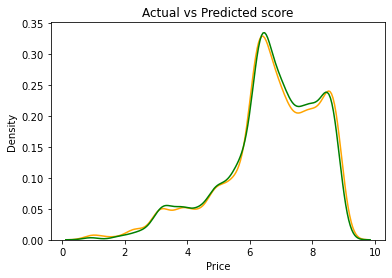

In [74]:
# lets check comparison of validation data and predicted data
ax1=sns.distplot(y_valid,hist=False,color="orange")
sns.distplot(y_pred_xgb,hist=False,color="g",ax=ax1)
plt.title("Actual vs Predicted score")
plt.xlabel("Price")

plt.show()

### predicting the test data with XGBRegressor as it has high accuracy, low RMSE compared to other models

In [77]:
# predicting for test data
test_pred = xgbr.predict(df_test)

In [81]:
test_pred

array([8.686511 , 8.724176 , 5.7989326, ..., 6.8458133, 5.1631346,
       8.145166 ], dtype=float32)

## Submission

In [82]:

#making a DataFrame for submission file to store the result 
submission = pd.DataFrame()
submission['patient_id'] = data_test['patient_id']
submission['base_score'] = test_pred                
#submission.head()
submission.to_csv('submission.csv', index=False)

In [83]:
submission

,patient_id,base_score
0,163740,8.686511
1,39293,8.724176
2,208087,5.798933
3,23295,5.936833
4,97013,5.468025
...,...,...
10755,151266,6.185513
10756,139347,3.984381
10757,159999,6.845813
10758,130945,5.163135


In [84]:
# lets read the submission file 
data_sub = pd.read_csv("submission.csv")
data_sub

,patient_id,base_score
0,163740,8.686511
1,39293,8.724176
2,208087,5.798933
3,23295,5.936833
4,97013,5.468025
...,...,...
10755,151266,6.185513
10756,139347,3.984381
10757,159999,6.845813
10758,130945,5.163135
